### Project 7: Machine Learning 
Mahitha \
My GitHub(https://github.com/mkunta1/datafun-07-applied)

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Part 1 - Chart a Straight Line
Plot celcius vs farenheit

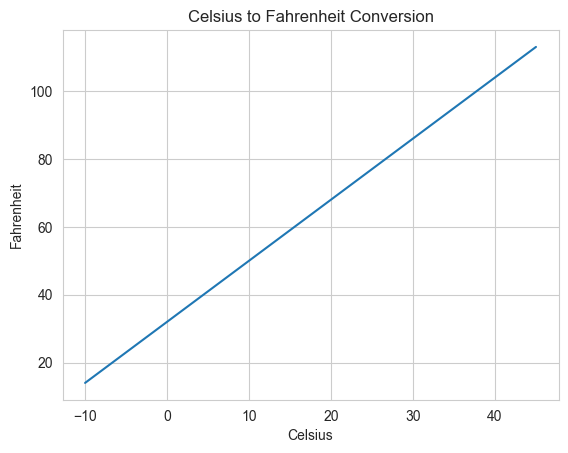

In [165]:
import matplotlib.pyplot as plt

def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

# Create a list of Celsius temperatures
celsius = range(-10, 47, 5)

# Convert Celsius temperatures to Fahrenheit
fahrenheit = [celsius_to_fahrenheit(c) for c in celsius]

# Plot the data
plt.plot(celsius, fahrenheit)
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.title('Celsius to Fahrenheit Conversion')
plt.grid(True)
plt.show()

## Part - 2 Prediction 
### Section 1 - Data Acquisition 

In [166]:
import pandas as pd
# Load the data
nyc_df = pd.read_csv(r'C:\Users\Mahi2\datafun-07-applied\datafun-07-applied\ave_hi_nyc_jan_1895-2018.csv')
# View the first few rows of the dataset
print(nyc_df.head())

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0


### Section 2- Data Inspection 

In [167]:
# View the first and last few rows of the dataset
nyc_df.head()
nyc_df.tail()


,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [168]:
# Rename column Value to Temperature 
nyc_df.columns = ['Date', 'Temperature', 'Anamaly']

print(nyc_df.head())

     Date  Temperature  Anamaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9
3  189801         39.6      2.2
4  189901         36.4     -1.0


In [169]:
print(nyc_df['Date'].dtype) 

int64


### Section 3 - Data Cleaning

In [170]:
nyc_df['Date'] = nyc_df['Date'].astype(int)
# Divide by 100 to truncate the last two digits
nyc_df['Date'] = nyc_df['Date'].floordiv(100)
print(nyc_df.head())


   Date  Temperature  Anamaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9
3  1898         39.6      2.2
4  1899         36.4     -1.0


### Section 4 - Descriptive Statistics

In [171]:
import pandas as pd

# Set display precision for the DataFrame output
pd.set_option('display.precision', 2)

# Get basic descriptive statistics for the Temperature column
descriptive_stats = nyc_df['Temperature'].describe()
print(descriptive_stats)

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


### Section 5 - Build the Model

In [172]:
from scipy import stats
import numpy as np

In [173]:
# Use linregress to calculate slope and intercept
linear_regression = stats.linregress(x=nyc_df['Date'], y=nyc_df['Temperature'])

# Get the slope and intercept
slope = linear_regression.slope
intercept = linear_regression.intercept

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.014771361132966163
Intercept: 8.694993233674289


### Section 6 - Predict 
predict the "average high temp in Jan" for the year 2024

In [174]:
# Predict average temperature in 2024
prediction_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print("Predicted average temperature in 2024:", prediction_2024)

# Predict average temperature in 1890
prediction_1890 = linear_regression.slope * 1890 + linear_regression.intercept
print("Predicted average temperature in 1890:", prediction_1890)

Predicted average temperature in 2024: 38.5922281667978
Predicted average temperature in 1890: 36.612865774980335


### Section 7 - Visualizations

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

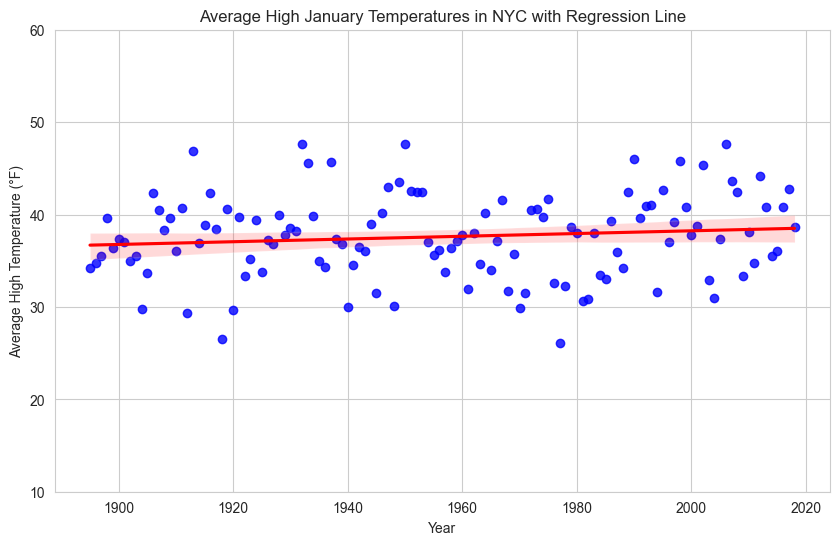

In [176]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Create the regression plot
plt.figure(figsize=(10, 6))
axes = sns.regplot(x=nyc_df['Date'], y=nyc_df['Temperature'], marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


# Set limits for the y-axis
axes.set_ylim(10, 60)

# Set labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Average High Temperature (°F)')
axes.set_title('Average High January Temperatures in NYC with Regression Line')

# Show the plot
plt.show()


### CC 7.7: Predict Avg High Temp in NYC in January (Part 3)
###  Part 3 - Prediction


Section 1 - Build the Model

In [177]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the file path
file_path = r'C:\Users\Mahi2\datafun-07-applied\datafun-07-applied\ave_hi_nyc_jan_1895-2018.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    
    # Rename columns for easier access
    df.columns = ['Date', 'Temperature', 'Anomaly']

    # Convert 'Date' to a datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

    # Prepare the data for modeling
    df['Year'] = df['Date'].dt.year  # Extract year for modeling
    X = df[['Year']]  # Feature variable
    y = df['Temperature']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make a prediction for 2024
    prediction = model.predict(pd.DataFrame({'Year': [2024]}))
    print(f"Predicted Average High Temperature in January 2024: {prediction[0]:.2f}°F")
else:
    print(f"Error: The file '{file_path}' does not exist. Please check the path and filename.")



Data loaded successfully!
Predicted Average High Temperature in January 2024: 38.11°F


In [178]:
print(df.head())

print(df.tail())

print("\nDataFrame Info:")
print(df.info())

# Display basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

        Date  Temperature  Anomaly  Year
0 1895-01-01         34.2     -3.2  1895
1 1896-01-01         34.7     -2.7  1896
2 1897-01-01         35.5     -1.9  1897
3 1898-01-01         39.6      2.2  1898
4 1899-01-01         36.4     -1.0  1899
          Date  Temperature  Anomaly  Year
119 2014-01-01         35.5     -1.9  2014
120 2015-01-01         36.1     -1.3  2015
121 2016-01-01         40.8      3.4  2016
122 2017-01-01         42.8      5.4  2017
123 2018-01-01         38.7      1.3  2018

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         124 non-null    datetime64[ns]
 1   Temperature  124 non-null    float64       
 2   Anomaly      124 non-null    float64       
 3   Year         124 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 3.5 KB
None

Descri

Section 2 - Test the model

In [179]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared value: {r2:.4f}")

Mean Squared Error: 21.7143
R-squared value: -0.0667


In [186]:
print(df.dtypes)
df['Date_numeric'] = df['Date'].apply(lambda x: x.toordinal())

Date           datetime64[ns]
Temperature           float64
Anomaly               float64
Year                    int32
dtype: object


Section 3 - Predict and Visualizations

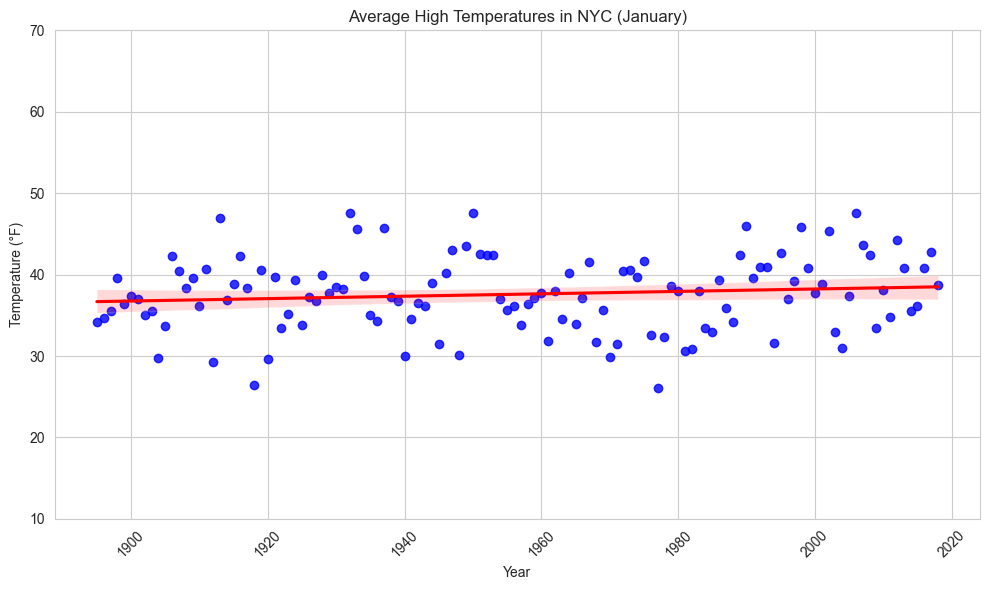

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for the year
df['Year'] = df['Date'].dt.year

# Create a figure and axes
fig, axes = plt.subplots(figsize=(10, 6))

# Plot the regression line with dots in blue and the line in red
sns.regplot(x='Year', y='Temperature', data=df, ax=axes, scatter=True, 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Check and set Y-axis limits
axes.set_ylim(10, 70)  # Adjust these values as needed

# Label the axes and title
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.title('Average High Temperatures in NYC (January)')
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

### CC 7.8: Add Your Insights (Part 4)

Method 1: Basic Linear Regression 

Simple and straightforward to implement.
Quick for small datasets and easy to understand.
Automatically returns the slope, intercept, and statistical metrics (e.g., r-value, p-value, standard error).

Method 2: Enhanced Linear Regression with scikit-learn
Pros:

More flexible and scalable, suitable for large datasets and multiple features.
Supports advanced functionalities like cross-validation, grid search, and pipelines.
Can handle different types of regression (e.g., polynomial regression, regularization).

Conclusion
Use Method 1 for quick analyses and simple datasets where interpretability and ease of use are prioritized.
Use Method 2 for more robust modeling, particularly when you have multiple features or need to implement advanced techniques.

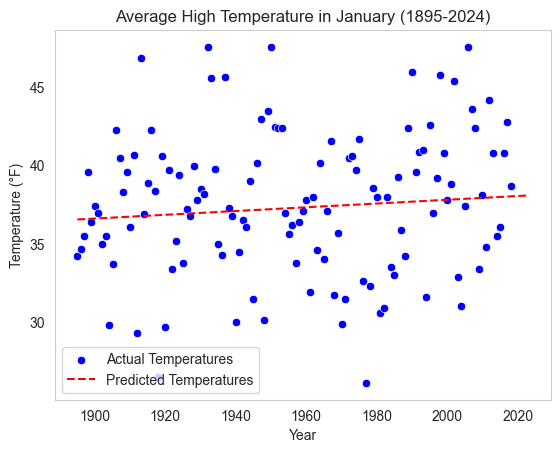

In [180]:
# Plot the actual temperatures
sns.scatterplot(x='Year', y='Temperature', data=df, label='Actual Temperatures', color='blue')

# Create a DataFrame for the prediction
future_years = pd.DataFrame({'Year': [year for year in range(df['Year'].min(), 2024)]})
future_temperatures = model.predict(future_years)

# Plot the predictions
plt.plot(future_years['Year'], future_temperatures, color='red', label='Predicted Temperatures', linestyle='--')

# Add titles and labels
plt.title('Average High Temperature in January (1895-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid()
plt.show()

In [189]:
# Initializing the linear regression model
model = LinearRegression()

# Training the model on the training data available
model.fit(X_train, y_train)

LinearRegression()

In [190]:
from sklearn.metrics import mean_squared_error
# Making predictions on the testing data
y_pred = model.predict(X_test)
# Evaluating the models using MSE metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21.714311446717552


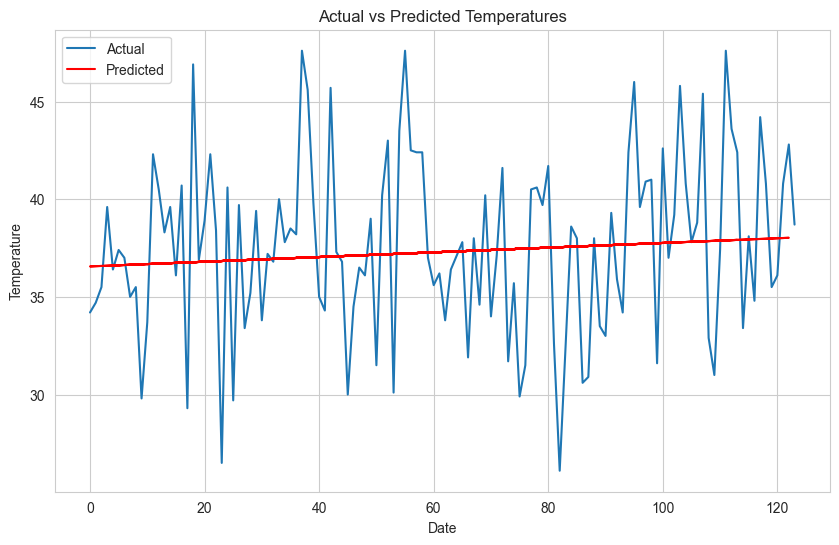

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(nyc_df.index, nyc_df['Temperature'], label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
# Saving the plot as an image
plt.savefig('actual_vs_predicted.png')
plt.show()